In [62]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [64]:
main = pd.concat([train,test],ignore_index=True)

In [65]:
main.drop('Unnamed: 0',axis=1,inplace=True)
main.head()

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0         120       RL     4.219508  8.502689   Pave  none      IR1   
1          20       RL     4.553877  9.671871   Pave  none      IR1   
2          60       RL     4.521789  9.202308   Pave  none      IR1   
3          20       RL     4.653960  9.371694   Pave  none      IR1   
4          20       RL     4.174387  9.719264   Pave  none      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1         Lvl    Inside       Mod        NAmes       Norm       Norm     1Fam   
2         Lvl   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr  6.864848   
1       1043         2217    GasA        Ex          Y      SBrkr  7.703910   
2        255         1117    GasA        Ex          Y      SBrkr  7.027315   
3       1139         1844    GasA        Ex          Y      SBrkr  7.519692   
4        356         1602    GasA        Gd          Y      SBrkr  7.379008   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0   6.864848             0             0         2   
1         0             0   7.703910             1             0         2   
2       886             0   7.607381             1             0         2   
3         0             0   7.519692             0             0         2   
4         0             0   7.379008             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           1          TA     Attchd          RFn           2         440   
1           1          TA     Attchd          Unf           2         621   
2           1          TA     Attchd          Unf 

In [66]:
#encoding categorical variables 
cat_var = []
for i in main.columns:
    if main[i].dtypes == 'O':
        cat_var.append(i)

In [67]:
for i in cat_var:
    labels_ordered=main.groupby([i])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    main[i]=main[i].map(labels_ordered)

In [68]:
main.head(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0         120         3     4.219508  8.502689       1      2         1   
1          20         3     4.553877  9.671871       1      2         1   
2          60         3     4.521789  9.202308       1      2         1   
3          20         3     4.653960  9.371694       1      2         1   
4          20         3     4.174387  9.719264       1      2         1   
5          60         3     4.060443  9.550662       1      2         1   
6          20         3     4.219508  9.336180       1      2         1   
7          20         3     4.477337  9.482274       1      2         0   
8          20         3     4.248495  9.123693       1      2         0   
9          50         3     4.382027  9.045466       1      2         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            1          1          1             9           3           4   
1            1          1          0            10           3           4   
2            1          4          1            24           3           4   
3            1          1          1            13           3           4   
4            1          0          1            13           3           4   
5            1          1          1            14           3           4   
6            1          1          1             6           3           4   
7            1          2          1             6           3           4   
8            1          2          1             4           1           4   
9            1          1          1            10           3           4   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         4           4            6            5          1         2   
1         3           4            8            6          4         4   
2         3           6            7            5          1         2   
3         3           4            6            6          3         2   
4         3           4            6            7          1         2   
5         3           6            7            5          1         2   
6         3           4            5            6          3         2   
7         3           4            5            4          1         2   
8         3           4            5            7          3         2   
9         3           1            5            5          1         2   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0            8            9           1         0.0          1          3   
1            3            4           1         0.0          2          2   
2            4            3           1         0.0          2          3   
3            8            9           2       480.0          1          3   
4           11           12           3       126.0          2          3   
5           10           11           1         0.0          2          3   
6            3            4           2       180.0          1          3   
7            3            4           0        67.0          1          3   
8            4            3           1         0.0          1          3   
9            4            3           1         0.0          1          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         3         3             1             4         120   
1           5         2         4             4             4         351   
2           5         3         3             3             6         862   
3           2         3         3             1             3         705   
4           2         3         3             1             4        1246   
5           5         3         3             3             5           0   
6           2         3         3             1             4        1302   
7           2         2         3      

In [69]:
test = main[main['SalePrice'].isnull()]
train = main[main['SalePrice'].notna()]

In [70]:
test.reset_index(inplace=True)
test.drop(['index','SalePrice'],inplace=True,axis=1)
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0          20         3     4.454347  9.557964       1      2         1   
1         120         3     3.871201  8.668024       1      2         1   
2          20         3     4.174387  9.379070       1      2         0   
3          70         3     4.317488  9.392662       1      2         0   
4          60         3     4.454347  9.588640       1      2         1   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          2          1            22           3           4   
1            1          4          1            22           3           4   
2            1          1          1            15           3           4   
3            0          1          1            17           3           4   
4            1          4          1            19           1           4   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         3           4            9            5          3         2   
1         4           4            8            5          1         2   
2         3           4            8            5          3         2   
3         3           6            7            7          1         2   
4         3           6            6            5          1         2   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0           10           11           3       200.0          2          3   
1            7            8           1         0.0          2          3   
2           10           11           1         0.0          2          3   
3            4            3           1         0.0          1          3   
4           10           11           3        74.0          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           5         4         3             4             6        1249   
1           2         3         3             3             6        1036   
2           5         3         3             3             5           0   
3           2         2         3             1             1         275   
4           5         3         3             2             5           0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             4           0        673         1922        5          4   
1             4           0        184         1220        5          3   
2             4           0       1753         1753        5          4   
3             4           0        429          704        5          4   
4             4           0        894          894        5          4   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1           4  7.561122         0             0   7.561122   
1           1           4  7.215240         0             0   7.215240   
2           1           4  7.488853         0             0   7.488853   
3           1           4  6.756932       704             0   7.355002   
4           1           4  6.795706      1039             0   7.566828   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            2             8           6           1            4           5   
1            2             4           6           1            5           5   
2            3             7           6           1            3           5   
3    

In [71]:
train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0         120         3     4.219508  8.502689       1      2         1   
1          20         3     4.553877  9.671871       1      2         1   
2          60         3     4.521789  9.202308       1      2         1   
3          20         3     4.653960  9.371694       1      2         1   
4          20         3     4.174387  9.719264       1      2         1   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            1          1          1             9           3           4   
1            1          1          0            10           3           4   
2            1          4          1            24           3           4   
3            1          1          1            13           3           4   
4            1          0          1            13           3           4   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0         4           4            6            5          1         2   
1         3           4            8            6          4         4   
2         3           6            7            5          1         2   
3         3           4            6            6          3         2   
4         3           4            6            7          1         2   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0            8            9           1         0.0          1          3   
1            3            4           1         0.0          2          2   
2            4            3           1         0.0          2          3   
3            8            9           2       480.0          1          3   
4           11           12           3       126.0          2          3   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0           2         3         3             1             4         120   
1           5         2         4             4             4         351   
2           5         3         3             3             6         862   
3           2         3         3             1             3         705   
4           2         3         3             1             4        1246   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0             4           0        958         1078        5          2   
1             2         823       1043         2217        5          4   
2             4           0        255         1117        5          4   
3             4           0       1139         1844        5          4   
4             4           0        356         1602        5          3   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           1           4  6.864848         0             0   6.864848   
1           1           4  7.703910         0             0   7.703910   
2           1           4  7.027315       886             0   7.607381   
3           1           4  7.519692         0             0   7.519692   
4           1           4  7.379008         0             0   7.379008   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0            1             5           6           1            3           5   
1            2             8           6           1            3           5   
2            1             8           6           1            3           5   
3    

In [72]:
#scaling input features
from sklearn.preprocessing import MinMaxScaler
ns = MinMaxScaler()

In [73]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [74]:
X = pd.DataFrame(ns.fit_transform(X),columns=X.columns)
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.588235      0.75     0.434909  0.275238     1.0    1.0  0.333333   
1    0.000000      0.75     0.558672  0.516729     1.0    1.0  0.333333   
2    0.235294      0.75     0.546795  0.419742     1.0    1.0  0.333333   
3    0.000000      0.75     0.595717  0.454728     1.0    1.0  0.333333   
4    0.000000      0.75     0.418208  0.526518     1.0    1.0  0.333333   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.333333       0.25        0.5      0.375000       0.375    0.571429   
1     0.333333       0.25        0.0      0.416667       0.375    0.571429   
2     0.333333       1.00        0.5      1.000000       0.375    0.571429   
3     0.333333       0.25        0.5      0.541667       0.375    0.571429   
4     0.333333       0.00        0.5      0.541667       0.375    0.571429   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0      1.00    0.571429     0.555556        0.500        0.2  0.285714   
1      0.75    0.571429     0.777778        0.625        0.8  0.571429   
2      0.75    0.857143     0.666667        0.500        0.2  0.285714   
3      0.75    0.571429     0.555556        0.625        0.6  0.285714   
4      0.75    0.571429     0.555556        0.750        0.2  0.285714   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.615385     0.642857    0.333333     0.00000   0.333333       0.75   
1     0.230769     0.285714    0.333333     0.00000   0.666667       0.50   
2     0.307692     0.214286    0.333333     0.00000   0.666667       0.75   
3     0.615385     0.642857    0.666667     0.30000   0.333333       0.75   
4     0.846154     0.857143    1.000000     0.07875   0.666667       0.75   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         0.4      0.75      0.75          0.25      0.666667    0.021262   
1         1.0      0.50      1.00          1.00      0.666667    0.062190   
2         1.0      0.75      0.75          0.75      1.000000    0.152729   
3         0.4      0.75      0.75          0.25      0.500000    0.124911   
4         0.4      0.75      0.75          0.25      0.666667    0.220765   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0      0.666667    0.000000   0.410103     0.176432      1.0       0.50   
1      0.333333    0.558345   0.446490     0.362848      1.0       1.00   
2      0.666667    0.000000   0.109161     0.182815      1.0       1.00   
3      0.666667    0.000000   0.487586     0.301800      1.0       1.00   
4      0.666667    0.000000   0.152397     0.262193      1.0       0.75   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0         1.0         1.0  0.398758  0.000000           0.0   0.372749   
1         1.0         1.0  0.716287  0.000000           0.0   0.669568   
2         1.0         1.0  0.460241  0.429056           0.0   0.635421   
3         1.0         1.0  0.646573  0.000000           0.0   0.604401   
4         1.0         1.0  0.593333  0.000000           0.0   0.554633   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0      0.000000           0.0  0.666667       0.0         0.250      0.333333   
1      0.333333           0.0  0.666667       0.0         0.500      0.333333   
2      0.333333           0.0  0.666667       0.5         0.375      0.333333   
3      0.000000           0.0  0.666667       0.0         0.375      0.333333   
4      0.000000           0.5  0.666667       0.0         0.375      0.333333   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0     0.333333      0.250000         1.0    0.333333          0.6    0.833333   
1     0.666667      0.500000         1.0    0.333333          0.6    0.833333   
2     0.333333      0.500000         1.0    0.333333          0.6    0.833333   
3    

In [75]:
X.shape

(1161, 77)

In [76]:
test = pd.DataFrame(ns.fit_transform(test),columns=test.columns)
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.000000      0.75     0.717062  0.450091     1.0    1.0  0.333333   
1    0.588235      0.75     0.420463  0.270274     1.0    1.0  0.333333   
2    0.000000      0.75     0.574669  0.413945     1.0    1.0  0.000000   
3    0.294118      0.75     0.647453  0.416691     1.0    1.0  0.000000   
4    0.235294      0.75     0.717062  0.456289     1.0    1.0  0.333333   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     1.000000       0.50        0.5      0.916667       0.375         1.0   
1     0.333333       1.00        0.5      0.916667       0.375         1.0   
2     0.333333       0.25        0.5      0.625000       0.375         1.0   
3     0.000000       0.25        0.5      0.708333       0.375         1.0   
4     0.333333       1.00        0.5      0.791667       0.125         1.0   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0      0.75    0.571429     0.857143     0.333333       0.75       0.0   
1      1.00    0.571429     0.714286     0.333333       0.25       0.0   
2      0.75    0.571429     0.714286     0.333333       0.75       0.0   
3      0.75    0.857143     0.571429     0.666667       0.25       0.0   
4      0.75    0.857143     0.428571     0.333333       0.25       0.0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.714286     0.733333    1.000000    0.193986   0.666667   0.666667   
1     0.500000     0.533333    0.333333    0.000000   0.666667   0.666667   
2     0.714286     0.733333    0.333333    0.000000   0.666667   0.666667   
3     0.285714     0.200000    0.333333    0.000000   0.333333   0.666667   
4     0.714286     0.733333    1.000000    0.071775   0.666667   0.666667   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         1.0      1.00  0.666667          1.00      1.000000    0.706848   
1         0.4      0.75  0.666667          0.75      1.000000    0.586304   
2         1.0      0.75  0.666667          0.75      0.833333    0.000000   
3         0.4      0.50  0.666667          0.25      0.166667    0.155631   
4         1.0      0.75  0.666667          0.50      0.833333    0.000000   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0      0.666667         0.0   0.347804     0.621202      1.0   1.000000   
1      0.666667         0.0   0.095090     0.394312      1.0   0.666667   
2      0.666667         0.0   0.905943     0.566580      1.0   1.000000   
3      0.666667         0.0   0.221705     0.227537      1.0   1.000000   
4      0.666667         0.0   0.462016     0.288946      1.0   1.000000   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0         1.0         1.0  0.880474  0.000000           0.0   0.691166   
1         1.0         1.0  0.695031  0.000000           0.0   0.508298   
2         1.0         1.0  0.841727  0.000000           0.0   0.652958   
3         1.0         1.0  0.449311  0.443046           0.0   0.582191   
4         1.0         1.0  0.470099  0.653870           0.0   0.694183   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.5           0.0  0.666667       0.0      0.500000           0.0   
1           0.5           0.0  0.333333       0.0      0.166667           0.0   
2           0.0           0.0  0.666667       0.0      0.500000           0.0   
3           0.0           0.0  0.333333       0.5      0.500000           0.0   
4           0.0           0.0  0.666667       0.5      0.666667           0.0   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0     0.666667      0.555556         1.0         0.5          0.8    0.833333   
1     0.666667      0.111111         1.0         0.5          1.0    0.833333   
2     1.000000      0.444444         1.0         0.5          0.6    0.833333   
3    

In [77]:
test.shape

(290, 77)

In [78]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [79]:
#IMPORTING MODELS
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [80]:
#IMPORTING TOOLS
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#IMPORTING METRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, r2_score

In [81]:
#splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
print("Shape of X_train is {}".format(X_train.shape))
print("Shape of X_test is {}".format(X_test.shape))
print("Shape of y_train is {}".format(y_train.shape))
print("Shape of y_test is {}".format(y_test.shape))

Shape of X_train is (812, 77)
Shape of X_test is (349, 77)
Shape of y_train is (812,)
Shape of y_test is (349,)


In [82]:
#general model performances
models = [SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('r squared error :',r2_score(y_test, y_pred))
    print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
    print('Mean squared error :', mean_squared_error(y_test, y_pred))
    print('Root means squared error :',  np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

SVR()
r squared error : 0.895617751457781
Mean absolute error : 0.08571063544515063
Mean squared error : 0.016245887657394778
Root means squared error : 0.12745935688443896


DecisionTreeRegressor()
r squared error : 0.6836931060544149
Mean absolute error : 0.15668643249735276
Mean squared error : 0.04922950344589523
Root means squared error : 0.22187722606408986


KNeighborsRegressor()
r squared error : 0.7869317663054775
Mean absolute error : 0.13225555607713121
Mean squared error : 0.03316160205689286
Root means squared error : 0.18210327305376162




In [83]:
#using random forest regressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('r squared error :',r2_score(y_test, y_pred))
print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred)))


r squared error : 0.8709872414087316
Mean absolute error : 0.09624684123910232
Mean squared error : 0.020079341187947394
Root mean squared error : 0.14170159204450525


In [84]:
importance = model.feature_importances_

<AxesSubplot:>

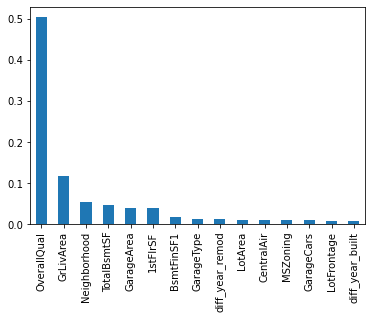

In [85]:
pd.Series(importance, index=X.columns).nlargest(15).plot(kind='bar')

In [86]:
#using boosting technique with feature plotting of 15 most important feature
models = [AdaBoostRegressor(base_estimator = RandomForestRegressor()), GradientBoostingRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('r2 squared error :',r2_score(y_test, y_pred))
    print('mean absolute error :', mean_absolute_error(y_test, y_pred))
    print('mean squared error :', mean_squared_error(y_test, y_pred))
    print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

AdaBoostRegressor(base_estimator=RandomForestRegressor())
r2 squared error : 0.8868716440277835
mean absolute error : 0.0884149741428097
mean squared error : 0.017607117950204348
root mean squared error : 0.1326918156865914


GradientBoostingRegressor()
r2 squared error : 0.9025290868877157
mean absolute error : 0.08344354445394694
mean squared error : 0.015170218369509327
root mean squared error : 0.12316744037897892


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
r

FROM THE ABOVE MODELS WE CAN SEE THAT GRADIENT BOOSTING IS PERFORMING WELL THAN OTHER MODELS

In [87]:
#lets try building each model using grid search cv , performing hypert parameter tuning on models

### Decision tree

In [92]:
dt_param = {'min_samples_split': np.arange(2, 20),
          'min_samples_leaf': np.arange(.05, .2),
          'max_leaf_nodes': np.arange(2, 30)}

dtr_grd = GridSearchCV(estimator = DecisionTreeRegressor(random_state = 42),
                      param_grid = dt_param,
                      cv= 5,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
dtr_grd.fit(X_train, y_train)

y_pred_dtr = dtr_grd.predict(X_test)

dt_metrics = []

print('r2 squared error :', r2_score(y_test, y_pred_dtr))
print('mean absolute error :', mean_absolute_error(y_test, y_pred_dtr))
print('mean squared error :', mean_squared_error(y_test, y_pred_dtr))
print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred_dtr)))

dt_metrics.append(r2_score(y_test, y_pred_dtr))
dt_metrics.append(mean_absolute_error(y_test, y_pred_dtr))
dt_metrics.append(mean_squared_error(y_test, y_pred_dtr))
dt_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
r2 squared error : 0.7215002091918297
mean absolute error : 0.15374383920193424
mean squared error : 0.04334526585952485
root mean squared error : 0.20819525897465785


In [95]:
dt_metrics

[0.7215002091918297,
 0.15374383920193424,
 0.04334526585952485,
 0.20819525897465785]

### K-neighbor

In [94]:
kn_param = {'n_neighbors': [2,3,4,5,6], 
              'weights': ['uniform','distance']}

knr_grd = GridSearchCV(estimator = KNeighborsRegressor(),
                      param_grid = kn_param,
                      cv= 5,
                      verbose = False,
                      scoring = 'r2',
                      n_jobs = -1)
knr_grd.fit(X_train, y_train)

y_pred_knr = knr_grd.predict(X_test)

kn_metrics = []

print('r2 squared error :',r2_score(y_test, y_pred_knr))
print('mean absolute error :', mean_absolute_error(y_test, y_pred_knr))
print('mean squared error :', mean_squared_error(y_test, y_pred_knr))
print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred_knr)))

kn_metrics.append(r2_score(y_test, y_pred_knr))
kn_metrics.append(mean_absolute_error(y_test, y_pred_knr))
kn_metrics.append(mean_squared_error(y_test, y_pred_knr))
kn_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred_knr)))

r2 squared error : 0.7917693912010824
mean absolute error : 0.1300876948760544
mean squared error : 0.032408681788550234
root mean squared error : 0.18002411446400796


In [96]:
kn_metrics

[0.7917693912010824,
 0.1300876948760544,
 0.032408681788550234,
 0.18002411446400796]

### Random forest regressor

In [97]:
rfr_param = {'n_estimators' : [50,100,200,400,500],
             'max_features' : ["auto", "sqrt", "log2"],
             'min_samples_split' : np.linspace(0.1, 1.0, 10)}

rfr_grd = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                      param_grid = rfr_param,
                      cv= 5,
                      verbose = False,
                      scoring = 'r2',
                      n_jobs = -1)
rfr_grd.fit(X_train, y_train)

y_pred_rfr = rfr_grd.predict(X_test)

rf_metrics = []

print('r2 squared error :',r2_score(y_test, y_pred_rfr))
print('mean absolute error :', mean_absolute_error(y_test, y_pred_rfr))
print('mean squared error :', mean_squared_error(y_test, y_pred_rfr))
print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

rf_metrics.append(r2_score(y_test, y_pred_rfr))
rf_metrics.append(mean_absolute_error(y_test, y_pred_rfr))
rf_metrics.append(mean_squared_error(y_test, y_pred_rfr))
rf_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

r2 squared error : 0.8008547596993298
mean absolute error : 0.12122275599331081
mean squared error : 0.030994649441001564
root mean squared error : 0.17605297339437798


In [98]:
rf_metrics

[0.8008547596993298,
 0.12122275599331081,
 0.030994649441001564,
 0.17605297339437798]

### Ada boost regressor 

In [99]:
adb_param = {'base_estimator' : [RandomForestRegressor()],
              'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']}

abr_grd = GridSearchCV(estimator = AdaBoostRegressor(random_state = 42),
                      param_grid = adb_param,
                      cv = 5,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
abr_grd.fit(X_train, y_train)

y_pred_abr = abr_grd.predict(X_test)

adb_metrics = []

print('r2 squared error :',r2_score(y_test, y_pred_abr))
print('mean absolute error :', mean_absolute_error(y_test, y_pred_abr))
print('mean squared error :', mean_squared_error(y_test, y_pred_abr))
print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred_abr)))

adb_metrics.append(r2_score(y_test, y_pred_abr))
adb_metrics.append(mean_absolute_error(y_test, y_pred_abr))
adb_metrics.append(mean_squared_error(y_test, y_pred_abr))
adb_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred_abr)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
r2 squared error : 0.8898664398485123
mean absolute error : 0.09004086856053317
mean squared error : 0.017141012677134682
root mean squared error : 0.13092369028229645


In [44]:
adb_metrics

r2 squared error : 0.8898664398485123
mean absolute error : 0.09004086856053317
mean squared error : 0.017141012677134682
root mean squared error : 0.13092369028229645


### Gradient boosting

In [100]:
gbr_param = {'learning_rate' : [1 ,0.1, 0.05, 0.01],
             'n_estimators' : [50, 100, 200],
             'max_depth' : np.linspace(1, 10, 20, endpoint=True),
             'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}

gbr_grd = GridSearchCV(estimator = GradientBoostingRegressor(random_state = 42),
                      param_grid = gbr_param,
                      cv = 5,
                      verbose = True,
                      scoring = 'r2',
                      n_jobs = -1)
gbr_grd.fit(X_train, y_train)

y_pred_gbr = gbr_grd.predict(X_test)

gb_metrics = []

print('r2 squared error :',r2_score(y_test, y_pred_gbr))
print('mean absolute error :', mean_absolute_error(y_test, y_pred_gbr))
print('mean squared error :', mean_squared_error(y_test, y_pred_gbr))
print('root mean squared error :',  np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

gb_metrics.append(r2_score(y_test, y_pred_gbr))
gb_metrics.append(mean_absolute_error(y_test, y_pred_gbr))
gb_metrics.append(mean_squared_error(y_test, y_pred_gbr))
gb_metrics.append(np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
r2 squared error : 0.893781978567327
mean absolute error : 0.08459988099134755
mean squared error : 0.016531604439312397
root mean squared error : 0.12857528704736534


***Gradient boosting shows the best results***

In [ ]:
#building a metrics for each model

In [111]:
metrics_table = pd.DataFrame({
    'Metrics':['R2_score', 'Mean_absolute_error', 'Mean_squared_error', 'Root_mean_squared_error'],
    'Decision tree' : dt_metrics,
    'KNN': kn_metrics,
    'Random Forest':rf_metrics,
    'Adaboost' : adb_metrics,
    'Gradient Boost': gb_metrics
})
metrics_table


Metrics  Decision tree       KNN  Random Forest  Adaboost  \
0                 R2_score       0.721500  0.791769       0.800855  0.889866   
1      Mean_absolute_error       0.153744  0.130088       0.121223  0.090041   
2       Mean_squared_error       0.043345  0.032409       0.030995  0.017141   
3  Root_mean_squared_error       0.208195  0.180024       0.176053  0.130924   

   Gradient Boost  
0        0.893782  
1        0.084600  
2        0.016532  
3        0.128575

In [113]:
#getting the best parameters for gradient boosting 
gbr_grd.best_params_

{'learning_rate': 0.1,
 'max_depth': 7.157894736842105,
 'min_samples_split': 0.7000000000000001,
 'n_estimators': 200}

In [114]:
#now building the final model for predicting our test data set

In [120]:
grd_final_model = GradientBoostingRegressor(learning_rate=0.1,max_depth=7.157894736842105,min_samples_split=0.7000000000000001,
                                           n_estimators=200)

In [121]:
final_model = grd_final_model.fit(X,y)

In [123]:
final_predict = grd_final_model.predict(test)
final_predict = pd.Series(final_predict, name = 'SalePrice')

In [124]:
final_predict

0      12.632804
1      12.074294
2      12.329754
3      12.108363
4      12.245840
5      11.110261
6      11.773027
7      12.464044
8      12.164745
9      11.786961
10     10.882434
11     11.872622
12     11.624281
13     12.034415
14     12.596700
15     11.736369
16     11.519403
17     11.529965
18     12.155597
19     12.349733
20     12.015983
21     11.845615
22     12.051988
23     10.987954
24     11.424711
25     11.789952
26     12.059919
27     11.933300
28     12.232830
29     11.170633
30     11.880792
31     12.145280
32     11.853480
33     11.504453
34     11.967958
35     11.998859
36     11.664181
37     12.213574
38     11.941925
39     11.244815
40     12.456744
41     12.241203
42     12.127769
43     11.766294
44     11.872596
45     11.714896
46     11.316991
47     11.991884
48     12.443792
49     11.923446
50     11.977485
51     11.234614
52     11.287619
53     12.565527
54     11.755566
55     11.817251
56     12.079056
57     11.423765
58     12.4232

In [125]:
test_predict = pd.concat([test,final_predict],axis=1)

In [127]:
test_predict.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    0.000000      0.75     0.717062  0.450091     1.0    1.0  0.333333   
1    0.588235      0.75     0.420463  0.270274     1.0    1.0  0.333333   
2    0.000000      0.75     0.574669  0.413945     1.0    1.0  0.000000   
3    0.294118      0.75     0.647453  0.416691     1.0    1.0  0.000000   
4    0.235294      0.75     0.717062  0.456289     1.0    1.0  0.333333   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     1.000000       0.50        0.5      0.916667       0.375         1.0   
1     0.333333       1.00        0.5      0.916667       0.375         1.0   
2     0.333333       0.25        0.5      0.625000       0.375         1.0   
3     0.000000       0.25        0.5      0.708333       0.375         1.0   
4     0.333333       1.00        0.5      0.791667       0.125         1.0   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0      0.75    0.571429     0.857143     0.333333       0.75       0.0   
1      1.00    0.571429     0.714286     0.333333       0.25       0.0   
2      0.75    0.571429     0.714286     0.333333       0.75       0.0   
3      0.75    0.857143     0.571429     0.666667       0.25       0.0   
4      0.75    0.857143     0.428571     0.333333       0.25       0.0   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.714286     0.733333    1.000000    0.193986   0.666667   0.666667   
1     0.500000     0.533333    0.333333    0.000000   0.666667   0.666667   
2     0.714286     0.733333    0.333333    0.000000   0.666667   0.666667   
3     0.285714     0.200000    0.333333    0.000000   0.333333   0.666667   
4     0.714286     0.733333    1.000000    0.071775   0.666667   0.666667   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0         1.0      1.00  0.666667          1.00      1.000000    0.706848   
1         0.4      0.75  0.666667          0.75      1.000000    0.586304   
2         1.0      0.75  0.666667          0.75      0.833333    0.000000   
3         0.4      0.50  0.666667          0.25      0.166667    0.155631   
4         1.0      0.75  0.666667          0.50      0.833333    0.000000   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
0      0.666667         0.0   0.347804     0.621202      1.0   1.000000   
1      0.666667         0.0   0.095090     0.394312      1.0   0.666667   
2      0.666667         0.0   0.905943     0.566580      1.0   1.000000   
3      0.666667         0.0   0.221705     0.227537      1.0   1.000000   
4      0.666667         0.0   0.462016     0.288946      1.0   1.000000   

   CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0         1.0         1.0  0.880474  0.000000           0.0   0.691166   
1         1.0         1.0  0.695031  0.000000           0.0   0.508298   
2         1.0         1.0  0.841727  0.000000           0.0   0.652958   
3         1.0         1.0  0.449311  0.443046           0.0   0.582191   
4         1.0         1.0  0.470099  0.653870           0.0   0.694183   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.5           0.0  0.666667       0.0      0.500000           0.0   
1           0.5           0.0  0.333333       0.0      0.166667           0.0   
2           0.0           0.0  0.666667       0.0      0.500000           0.0   
3           0.0           0.0  0.333333       0.5      0.500000           0.0   
4           0.0           0.0  0.666667       0.5      0.666667           0.0   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  \
0     0.666667      0.555556         1.0         0.5          0.8    0.833333   
1     0.666667      0.111111         1.0         0.5          1.0    0.833333   
2     1.000000      0.444444         1.0         0.5          0.6    0.833333   
3    

In [128]:
test_predict.to_csv('test_predicition.csv')

# saving the model

In [129]:
import joblib
joblib.dump(grd_final_model, 'house_price.pkl')

['house_price.pkl']

# Feature importance using Gradient boosting

In [135]:
final_importance = grd_final_model.feature_importances_

In [136]:
final_importance

array([0.00000000e+00, 1.05709860e-02, 4.37898298e-04, 1.30103054e-02,
       0.00000000e+00, 0.00000000e+00, 2.35926347e-05, 0.00000000e+00,
       4.18508583e-04, 5.15362340e-05, 1.09951936e-01, 1.93279443e-03,
       8.01294830e-05, 3.98626365e-05, 1.59546103e-04, 3.70481654e-01,
       1.68010666e-02, 0.00000000e+00, 9.66671166e-05, 1.45584713e-03,
       1.88046522e-04, 2.12873523e-05, 3.78038315e-04, 4.98704833e-05,
       2.09552424e-04, 0.00000000e+00, 9.75048458e-03, 1.70493682e-03,
       2.44157500e-03, 2.84602731e-04, 2.20445224e-02, 1.39600601e-04,
       2.39181457e-04, 6.78257114e-04, 5.46811947e-02, 1.45537098e-03,
       7.46419361e-04, 1.41793114e-02, 5.52239633e-05, 4.64092848e-03,
       5.33531000e-03, 3.46132499e-04, 2.06661721e-01, 1.74316751e-03,
       0.00000000e+00, 3.31192438e-04, 3.72565120e-04, 3.37220047e-04,
       0.00000000e+00, 2.41562420e-02, 7.60772677e-05, 2.53417041e-03,
       7.77664221e-05, 1.88562807e-02, 2.14157117e-02, 9.47748436e-03,
      

<AxesSubplot:>

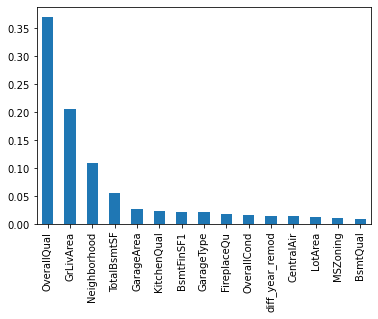

In [138]:
pd.Series(final_impotance, index=X.columns).nlargest(15).plot(kind='bar')